In [1]:
from ConV2d import ConV2D,Pool
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
#sns.set_style("darkgrid")
%matplotlib inline

Convolution output shape: (1, 100, 500, 16)
Pooling output shape: (1, 50, 250, 16)
Pooling error shape: (1, 100, 500, 16)
Convolution error shape: (1, 100, 500, 4)


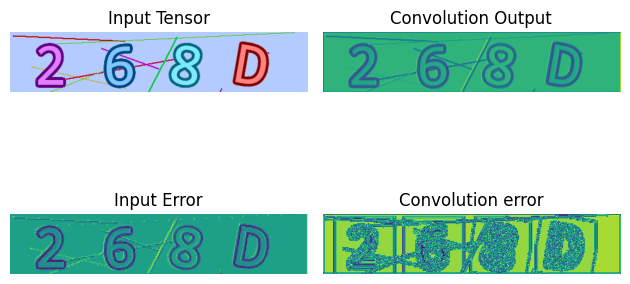

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random input tensor
url = r"C:\Users\rahul\python\Machine learning\IITK\Assingment 2\assn2\train\0.png"
myImg = np.array(Image.open(url))#,plugin="matplotlib"))
n_h,n_w,n_c = myImg.shape
input_tensor =  myImg.reshape(1,n_h,n_w,n_c)

# Create a Conv2D layer
conv_layer = ConV2D(filters=16, kernel_size=(3, 3), stride=1, pad=1)

# Perform forward propagation
conv_output = conv_layer.forward_prop(input_tensor)
print("Convolution output shape:", conv_output.shape)

# Create a Pooling layer
pool_layer = Pool(kernel_size=(2, 2), stride=2, type_="Max")

# Perform forward propagation
pool_output = pool_layer.forward_prop(conv_output)
print("Pooling output shape:", pool_output.shape)

# Generate random error for backward propagation
error = (pool_output)

# Perform backward propagation on Pooling layer
pool_error = pool_layer.backward_prop(error, learning_rate=0.01)
print("Pooling error shape:", pool_error.shape)

# Perform backward propagation on Conv2D layer
conv_error = conv_layer.backward_prop(pool_error, learning_rate=0.01)
print("Convolution error shape:", conv_error.shape)

# Plot the input tensor
plt.figure()
plt.subplot(2, 2, 1)
plt.title("Input Tensor")
plt.imshow(input_tensor[0])
plt.axis("off")

# Plot the convolution output
plt.subplot(2, 2, 2)
plt.title("Convolution Output")
plt.imshow(conv_output[0, :, :, 0]) #, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Input Error")
plt.imshow(pool_output[0,:,:,0])
plt.axis("off")

# Plot the convolution output
plt.subplot(2, 2, 4)
plt.title("Convolution error")
plt.imshow(conv_error[0, :, :, 0]) #, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
